In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
jgbcm = pd.read_csv("https://www.mof.go.jp/jgbs/reference/interest_rate/jgbcm.csv", skiprows=1, encoding="shift-jis")
jgbcm_all = pd.read_csv("https://www.mof.go.jp/jgbs/reference/interest_rate/data/jgbcm_all.csv", skiprows=1, encoding="shift-jis")
interest_rate = pd.concat([jgbcm_all, jgbcm], axis=0).replace('-', np.nan)
shr = interest_rate["基準日"].str.extract(r"([SHR])(\d+).(\d+).(\d+)", expand=True)

In [32]:
shr[1] = shr[1].astype('Int64')
shr[1] = shr[1].mask(shr[0]=="S", shr[1] + 25 + 1900)
shr[1] = shr[1].mask(shr[0]=="H", shr[1] - 12 + 2000)
shr[1] = shr[1].mask(shr[0]=="R", shr[1] + 18 + 2000)

In [33]:
shr[1] = shr[1].astype(str)

In [34]:
interest_rate["基準日"] = pd.to_datetime(shr[1] + "-" + shr[2] + "-" + shr[3])
interest_rate = interest_rate.set_index("基準日").stack().reset_index()
interest_rate.columns = ["基準日", "年限", "金利"]
interest_rate["年限"] = interest_rate["年限"].str.replace("年", "").astype(int)
interest_rate["金利"] = interest_rate["金利"].astype(float) / 100

In [35]:
interest_rate

,基準日,年限,金利
0,1974-09-24,1,0.10327
1,1974-09-24,2,0.09362
2,1974-09-24,3,0.08830
3,1974-09-24,4,0.08515
4,1974-09-24,5,0.08348
...,...,...,...
160922,2025-12-09,15,0.02523
160923,2025-12-09,20,0.02917
160924,2025-12-09,25,0.03271
160925,2025-12-09,30,0.03334


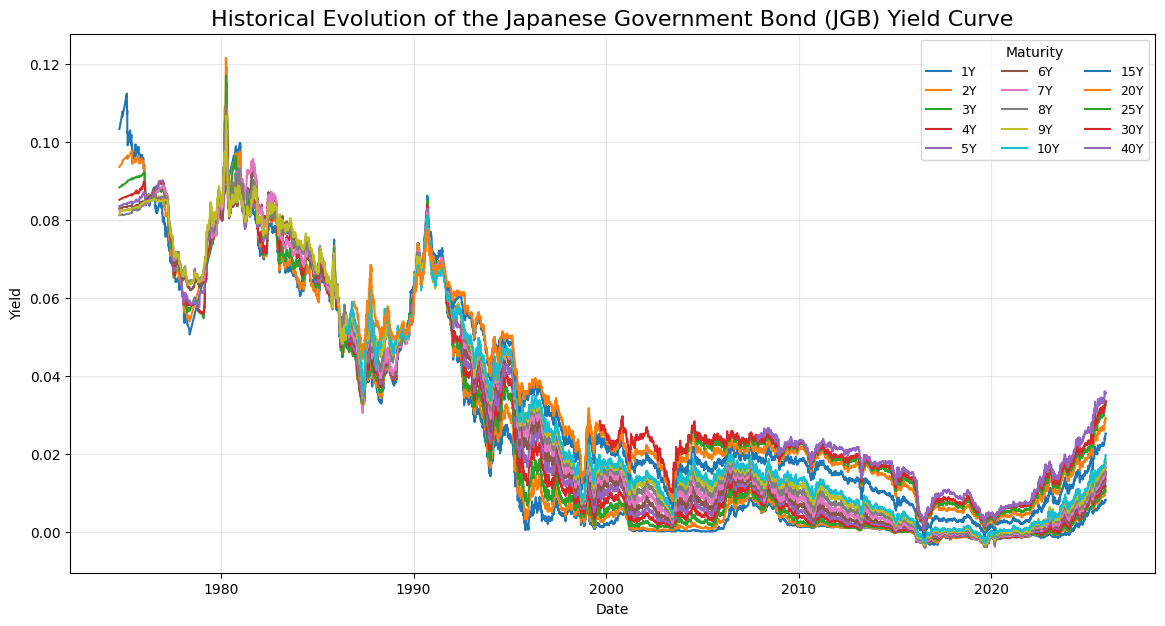

In [36]:
plt.figure(figsize=(14, 7))

for m in sorted(interest_rate["年限"].unique()):
    df_m = interest_rate[interest_rate["年限"] == m]
    plt.plot(df_m["基準日"], df_m["金利"], label=f"{m}Y")

plt.title("Historical Evolution of the Japanese Government Bond (JGB) Yield Curve", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Yield")
plt.legend(title="Maturity", ncol=3, fontsize=9)
plt.grid(True, alpha=0.3)

plt.show()